# does it make sense to ingnore the structure??

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=3)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
backend module://ipykernel.pylab.backend_inline version unknown


# Load data

In [28]:
import ShaKer.rna_tools.rna_io as rio

def getdata():
    return rio.get_all_data("../data/RNA16.react","../data/RNA16.dbn")  # {key: rea, seq, stru}

data = getdata()
dataflat = {k:(data[k][0],data[k][1],'.'*len(data[k][1]) ) for k in data}

print dataflat

{'TRP5': ([None, None, None, None, None, None, None, 0.7192, 0.5855, 0.4431, 0.3694, 0.3655, 0.3603, 0.4204, 0.3383, 0.5235, 0.6026, 0.6221, 0.3151, 0.1919, 0.1514, 0.1401, 0.1267, 0.1455, 0.2975, 0.3512, 0.4322, 0.2968, 0.1409, 0.1249, 0.1285, 0.1726, 0.2461, 1.4974, 0.5751, 0.4019, 1.3586, 0.4605, 0.1704, 0.1394, 0.1579, 1.0831, 0.6245, 0.2119, 0.1105, 0.11, 0.1276, 0.0936, 0.0586, 0.0843, 0.1339, 0.1987, 0.1068, 0.0763, 0.0455, 0.031, 0.031, 0.0331, 0.0455, 0.0497, 0.0624, 0.0419, 0.1397, 0.1122, 0.0963, 0.054, 0.0515, 0.0686, 0.0623, 0.0479, 0.0399, 0.0391, 0.0539, 0.1031, 0.1286, 0.0964, 0.0595, 0.0817, 0.1939, 1.3608, 0.4763, 0.3217, 0.3712, 0.3768, 0.2661, 0.1716, 0.167, 0.2305, 0.5126, 4.0742, 1.2539, 0.2849, 0.1263, 0.1417, 0.1839, 0.2468, 0.286, 0.3084, 0.2525, 0.1469, 0.0597, 0.0397, 0.0516, 0.0832, 0.1453, 0.0583, 0.1151, 0.2323, 0.2933, 2.7637, 2.8997, 0.3014, 0.202, 0.1568, 0.1562, 0.1366, 0.3513, 0.613, 0.6507, 0.1964, 0.2025, 1.8721, 0.3077, 0.1434, 0.1361, 0.1947, 0.15

# train predict

In [29]:
import ShaKer.simushape as sim
from ShaKer.rna_tools.rnaplfold import rnaplfold


model  = sim.make_model(data,['23sRNA','R009'])
model2  = sim.make_model(dataflat,['23sRNA','R009'])

data.pop("23sRNA")
data.pop("R009")
dataflat.pop("23sRNA")
dataflat.pop("R009")



keys = data.keys()

def get_str(seq):
    return ['.'*len(seq)]

    
predictions =     { k: (data[k][1],sim.predict(model,data[k][1])) for k in keys  }
predictions_nostr = { k: (data[k][1],sim.predict(model2,data[k][1], seq_to_db_function=get_str)) for k in keys  }

acc_shaker = {k: rnaplfold(*predictions[k]) for  k in keys} 
acc_shaker_nostr = {k: rnaplfold(*predictions_nostr[k]) for  k in keys} 


In [30]:
from scipy.stats import spearmanr as spear 

for k in keys:
    print "%s \t %.2f \t %.2f" % (k, spear(predictions[k][1],data[k][0])[0],spear(predictions_nostr[k][1],data[k][0])[0]    )

TRP5 	 0.48 	 0.25
5srRNA 	 0.46 	 0.28
GLYCFN 	 0.17 	 0.24
RNAsep 	 0.34 	 0.25
adenin 	 0.19 	 0.03
Z-CIDGMP-1 	 0.44 	 0.25
ZHCV 	 0.09 	 -0.07
MDLOOP 	 0.55 	 0.46
srRNA 	 -0.07 	 -0.06
p564 	 0.38 	 0.05
tRNAphe 	 0.24 	 0.24
ZGLY 	 0.36 	 0.39
ADDRSW 	 0.25 	 0.19
tRNA-asp 	 0.33 	 0.14


# real and sukosd based accessibility

In [31]:
acc_shape =  {k: rnaplfold(data[k][1],data[k][0]) for  k in keys}  


In [32]:

corr = lambda ac1, ac2:[spear(ac1[k], ac2[k])[0] for k in keys]

corr_shaker =  corr(acc_shaker, acc_shape)
corr_shaker_nostr =  corr(acc_shaker_nostr, acc_shape)


# Visualize 

Assigning font /F1 = u'/home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
Embedding font /home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
Assigning font /F1 = u'/home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
Embedding font /home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.


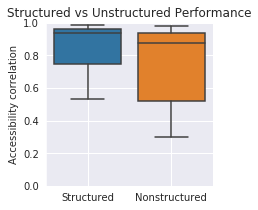

In [53]:
import pandas
import numpy as np
index= ['Structured',"Nonstructured"]

data2 = [corr_shaker,corr_shaker_nostr]


import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(3,3))
sns.boxplot(data=pandas.DataFrame(data2, index=index).T)
TITLE = "Accessibility"
plt.title("Structured vs Unstructured Performance")
plt.grid()
axes = plt.gca()
axes.set_ylim([-0,1])
axes.set_ylabel("Accessibility correlation")
axes.grid(b=True, which='major', color='w', linewidth=1.0)
plt.savefig("stvsust.pdf", bbox_inches='tight')


---